# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, June 13, 2022 at 18:00**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

C:\Users\Kenny\miniconda3\envs\cpsc330\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


> If you get a `FutureWarning` regarding `pandas.Int64Index`, you can ignore it. It is because of a [known issue in `xgboost`](https://github.com/dmlc/xgboost/issues/7593).

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022s/blob/master/docs/homework_instructions.md).

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.
- The maximum group size is 2.
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

*The target column has two possible values, so this is a binary classification problem. There are many numeric features in NT dollar. Wouldn't it be more useful to look at the portion of the bill amount that was not paid off?*

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv", encoding="utf-8", index_col=0)
# pd.set_option('display.max_columns', None)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.shape

(30000, 24)

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [4]:
train_df, test_df = train_test_split(df, test_size=.1, random_state=123)
print(train_df.shape, test_df.shape)

(27000, 24) (3000, 24)


In [5]:
target = "default.payment.next.month"
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test = test_df.drop(columns=[target])
y_test = test_df[target]

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 10660 to 19967
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27000 non-null  float64
 1   SEX                         27000 non-null  int64  
 2   EDUCATION                   27000 non-null  int64  
 3   MARRIAGE                    27000 non-null  int64  
 4   AGE                         27000 non-null  int64  
 5   PAY_0                       27000 non-null  int64  
 6   PAY_2                       27000 non-null  int64  
 7   PAY_3                       27000 non-null  int64  
 8   PAY_4                       27000 non-null  int64  
 9   PAY_5                       27000 non-null  int64  
 10  PAY_6                       27000 non-null  int64  
 11  BILL_AMT1                   27000 non-null  float64
 12  BILL_AMT2                   27000 non-null  float64
 13  BILL_AMT3                  

There seem to be no missing values.

In [7]:
train_df.describe(include="all")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,168172.358519,1.603444,1.850963,1.551370,35.479593,-0.019778,-0.136667,-0.171074,-0.224259,-0.267704,...,43361.679593,40290.370111,38794.481185,5665.860000,5.912862e+03,5280.944963,4762.736519,4803.723000,5269.512963,0.221074
std,130202.924869,0.489191,0.790005,0.521359,9.203678,1.123960,1.197113,1.196480,1.168609,1.134351,...,64593.470780,60947.562511,59631.434148,16613.969212,2.125517e+04,18021.885109,15191.999180,15332.264484,18156.151174,0.414978
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2303.750000,1748.500000,1225.000000,990.000000,8.192500e+02,390.000000,291.000000,249.000000,120.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19033.000000,18043.000000,16940.500000,2100.000000,2.010000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54562.500000,50114.250000,49058.250000,5011.000000,5.000000e+03,4600.000000,4014.000000,4037.750000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


There are big negative bill amounts. 

In [8]:
train_df.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     20713
BILL_AMT2                     20364
BILL_AMT3                     20098
BILL_AMT4                     19675
BILL_AMT5                     19197
BILL_AMT6                     18824
PAY_AMT1                       7455
PAY_AMT2                       7438
PAY_AMT3                       7060
PAY_AMT4                       6503
PAY_AMT5                       6491
PAY_AMT6                       6505
default.payment.next.month        2
dtype: int64

There are 7 unique values for EDUCATION where 6 are expected according to the documentation. We may not be able to apply ordinal encoding due to the lack of information.
MARRIAGE has 4 uniques values where 3 were expected.

In [9]:
print(train_df['EDUCATION'].value_counts())
print(train_df['MARRIAGE'].value_counts())
print(train_df['PAY_0'].value_counts())

2    12613
1     9559
3     4407
5      252
4      110
6       45
0       14
Name: EDUCATION, dtype: int64
2    14374
1    12296
3      281
0       49
Name: MARRIAGE, dtype: int64
 0    13243
-1     5151
 1     3310
-2     2492
 2     2383
 3      293
 4       70
 5       23
 8       16
 6       10
 7        9
Name: PAY_0, dtype: int64


The PAY_X columns also have unexplained values. After some digging in the Discussion section on Kaggle, I discovered that `-2` means no card use, and `0` means card use with no delay.

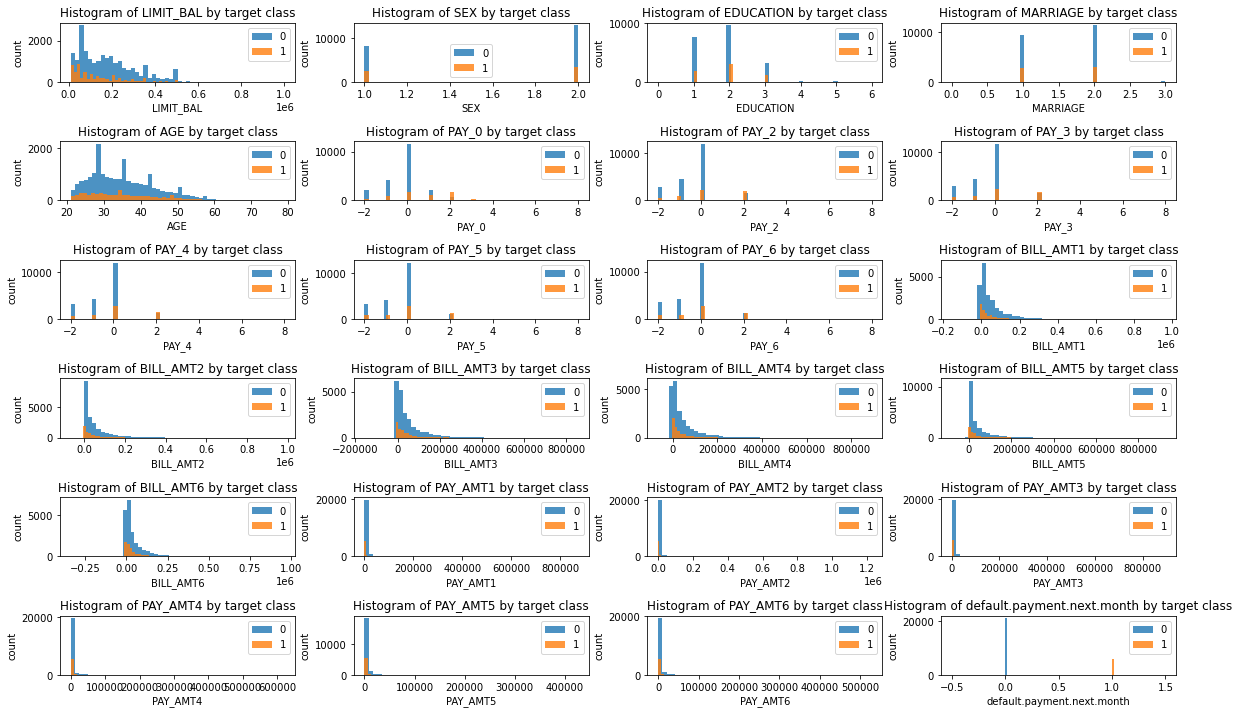

In [10]:
negative_examples = train_df.query("`default.payment.next.month` == 0")
positive_examples = train_df.query("`default.payment.next.month` == 1")

features = train_df.columns
fig, axes = plt.subplots(
    nrows=6, ncols=4, sharex=False, sharey=False, figsize = (20,12)
)

for n, feature in enumerate(features):
    ax = axes[n // 4, n % 4]
    ax.hist(negative_examples[feature], alpha=0.8, bins=50, label="0")
    ax.hist(positive_examples[feature], alpha=0.8, bins=50, label="1")
    ax.set(xlabel=feature, ylabel="count")
    ax.title.set_text(f"Histogram of {feature} by target class")
    ax.legend(loc="best")
    
plt.subplots_adjust(wspace=0.25, hspace=1)
plt.show()

The features mostly don't look useful on their own. Only `LIMIT_BAL` and `PAY_0` appear to be somewhat useful for this task.

<AxesSubplot:>

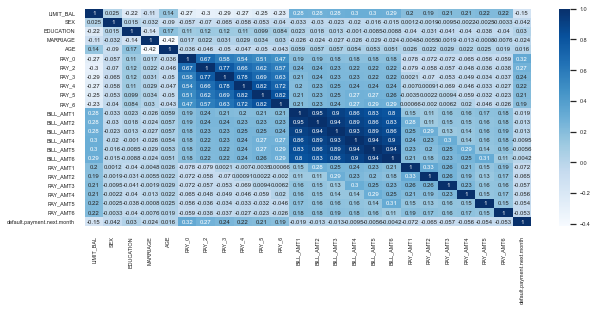

In [11]:
cor = train_df.corr()
plt.figure(figsize=(10, 4))
sns.set(font_scale=0.5)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

**Please excuse the small size of the plot. If this plot is rendered bigger, the notebook gets too big to show up in Gradescope.**

The correlation heatmap shows mostly weak correlation to the target. The payment statuses are the most important features, it seems.

In [12]:
y_train.value_counts(normalize=True)

0    0.778926
1    0.221074
Name: default.payment.next.month, dtype: float64

There is a bit of class imbalance, but it is not drastic.

**Summary**: Most individual features don't appear to be useful indicators of the target. The most useful features appear to be ordinal. Hence, a model that can account for feature interactions may be appropriate.

Considering the imbalance, **recall** is the most important metric in most applications of this model. False negatives need to be minimized in order for the model to be useful as a warning system. 

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

In [13]:
pay_status = X_train.loc[:, ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].to_numpy()
pay_amounts = X_train.loc[:, ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].to_numpy()
bill_amounts = X_train.loc[:, ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].to_numpy()
# limit_bals = X_train['LIMIT_BAL'].to_numpy()
# X_train['UNPAY_MEAN'] = ((bill_amounts - pay_amounts) / limit_bals[:,None]).mean(axis=1)
X_train['PAY_MAX'] = pay_status.max(axis=1)
X_train['PAY_MIN'] = pay_status.min(axis=1)
X_train['PAY_MEAN'] = pay_amounts.mean(axis=1)
X_train['BILL_MEAN'] = bill_amounts.mean(axis=1)

X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_MAX,PAY_MIN,PAY_MEAN,BILL_MEAN
ID,,,,,,,,,,,,,,,,,,,,,
10660,80000.0,2,2,2,23,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-2,0.000000,0.000000
3207,300000.0,2,1,1,37,-1,-1,0,-1,-1,...,5734.0,2018.0,3138.0,3187.0,1597.0,2394.0,0,-1,3011.333333,3167.500000
3397,210000.0,2,1,2,43,1,-1,0,0,0,...,184212.0,5482.0,3493.0,3590.0,3815.0,3876.0,1,-1,34078.000000,128323.166667
9026,20000.0,1,1,2,25,0,0,0,0,0,...,1595.0,1551.0,752.0,773.0,772.0,354.0,0,0,966.166667,17206.166667
4023,250000.0,2,1,1,44,-2,-2,-2,-2,-2,...,5417.0,7948.0,1797.0,1580.0,12573.0,4338.0,-1,-2,5608.833333,5715.166667


<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [14]:
numeric_features = ['LIMIT_BAL', 'AGE', 'PAY_MEAN', 'BILL_MEAN']
# It would've been better to make EDUCATION ordinal, but the data description doesn't specify all the labels.
categorical_features = ['EDUCATION', 'MARRIAGE']
ordinal_features = ['PAY_MAX', 'PAY_0', 'PAY_MIN']
binary_features = ['SEX']
# These are too many for interpretability and computation cost. Using mean values from the section above instead.
drop_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [15]:
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore", dtype=int, sparse=False), categorical_features),
    (OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse=False, dtype=int), binary_features),
    (OrdinalEncoder(dtype=int, categories=[list(range(-2, 10)) for i in ordinal_features]), ordinal_features),
    ("drop", drop_features),
)

In [16]:
preprocessor.fit(X_train, y_train)

new_columns = []

for tf in preprocessor.named_transformers_.values():
    if type(tf) == str:
        continue
    elif type(tf) == OrdinalEncoder:
        continue
    else:
        new_columns.extend(tf.get_feature_names_out())

new_columns.extend(ordinal_features)
        
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)

X_train_enc.head(5)

,LIMIT_BAL,AGE,PAY_MEAN,BILL_MEAN,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_2,PAY_MAX,PAY_0,PAY_MIN
ID,,,,,,,,,,,,,,,,,,,
10660,-0.677204,-1.355961,-0.525370,-0.709562,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,0.0
3207,1.012497,0.165199,-0.225884,-0.659553,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0
3397,0.321256,0.817124,2.863780,1.316435,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,1.0
9026,-1.138032,-1.138652,-0.429282,-0.437907,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0
4023,0.628474,0.925778,0.032444,-0.619330,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [17]:
dummy = DummyClassifier()

In [18]:
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)

0.7789259259259259

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [19]:
scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]
lr = LogisticRegression(max_iter=2000, random_state=123)
pipe_lr = make_pipeline(preprocessor, lr)
cv = cross_validate(pipe_lr, X_train, y_train, cv=5, return_train_score=True, scoring=scoring)
cv = pd.DataFrame(cv)

In [20]:
# from hw3
out_col = []
mean_scores = cv.mean()
std_scores = cv.std()
for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
pd.Series(data=out_col, index=mean_scores.index)

fit_time           0.443 (+/- 0.041)
score_time         0.019 (+/- 0.004)
test_accuracy      0.804 (+/- 0.002)
train_accuracy     0.804 (+/- 0.002)
test_f1            0.319 (+/- 0.018)
train_f1           0.318 (+/- 0.015)
test_recall        0.208 (+/- 0.015)
train_recall       0.207 (+/- 0.013)
test_precision     0.689 (+/- 0.012)
train_precision    0.687 (+/- 0.005)
dtype: object

The model doesn't perform well. The accuracy is only slightly above the baseline. The recall is very low where we really want to minimize false negatives. This needs a lot of improvement.

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

In [21]:
# Adapted from Lecture 11 

from sklearn.tree import DecisionTreeClassifier

pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123, max_depth=7))
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, max_depth=5))
pipe_svc = make_pipeline(preprocessor, SVC(gamma=0.1))

classifiers = {
    "logistic regression": pipe_lr,
    "decision tree": pipe_dt,
    "random forest": pipe_rf,
    "svc": pipe_svc,
}

In [22]:
import warnings

warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [23]:
# From Lecture 5
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [24]:
results = {}
for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring
    )
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
logistic regression,0.446 (+/- 0.011),0.018 (+/- 0.002),0.804 (+/- 0.002),0.804 (+/- 0.002),0.319 (+/- 0.018),0.318 (+/- 0.015),0.208 (+/- 0.015),0.207 (+/- 0.013),0.689 (+/- 0.012),0.687 (+/- 0.005)
decision tree,0.085 (+/- 0.010),0.014 (+/- 0.002),0.817 (+/- 0.005),0.829 (+/- 0.002),0.457 (+/- 0.019),0.493 (+/- 0.011),0.348 (+/- 0.020),0.375 (+/- 0.013),0.668 (+/- 0.028),0.717 (+/- 0.006)
random forest,0.888 (+/- 0.028),0.055 (+/- 0.004),0.821 (+/- 0.005),0.823 (+/- 0.001),0.450 (+/- 0.016),0.456 (+/- 0.004),0.332 (+/- 0.013),0.336 (+/- 0.004),0.699 (+/- 0.023),0.709 (+/- 0.007)
svc,21.462 (+/- 1.327),4.717 (+/- 0.078),0.820 (+/- 0.004),0.823 (+/- 0.001),0.451 (+/- 0.015),0.460 (+/- 0.003),0.335 (+/- 0.013),0.342 (+/- 0.003),0.691 (+/- 0.021),0.703 (+/- 0.005)


Logistic regression is beaten by tree-based ensemble models. They have similar or slightly better accuracy. More importantly, the recalls of the tree-based ensemble models are significantly better than that of the logistic regression model.

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

In [25]:
from sklearn.feature_selection import RFECV
rfe_cv = RFECV(LogisticRegression(max_iter=1000), cv=5)

def test_feature_selection():
    pipe_lr = make_pipeline(preprocessor, rfe_cv, lr)
    pipe_dt = make_pipeline(preprocessor, rfe_cv, DecisionTreeClassifier(random_state=123, max_depth=7))
    pipe_rf = make_pipeline(preprocessor, rfe_cv, RandomForestClassifier(random_state=123, max_depth=5))
    pipe_svc = make_pipeline(preprocessor, rfe_cv, SVC(gamma=0.1))

    classifiers = {
        "logistic regression": pipe_lr,
        "decision tree": pipe_dt,
        "random forest": pipe_rf,
        "svc": pipe_svc,
    }

    results = {}
    for (name, model) in classifiers.items():
        results[name] = mean_std_cross_val_scores(
            model, X_train, y_train, return_train_score=True, scoring=scoring
        )
    return (classifiers, pd.DataFrame(results).T)

fs_classifiers, scores = test_feature_selection()
scores

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
logistic regression,15.532 (+/- 0.789),0.018 (+/- 0.004),0.806 (+/- 0.010),0.807 (+/- 0.011),0.335 (+/- 0.089),0.338 (+/- 0.098),0.227 (+/- 0.075),0.230 (+/- 0.081),0.677 (+/- 0.019),0.684 (+/- 0.026)
decision tree,16.000 (+/- 1.456),0.019 (+/- 0.004),0.812 (+/- 0.012),0.818 (+/- 0.014),0.406 (+/- 0.101),0.419 (+/- 0.113),0.299 (+/- 0.090),0.308 (+/- 0.100),0.663 (+/- 0.031),0.696 (+/- 0.019)
random forest,16.630 (+/- 1.044),0.048 (+/- 0.003),0.813 (+/- 0.011),0.814 (+/- 0.014),0.392 (+/- 0.102),0.395 (+/- 0.114),0.281 (+/- 0.088),0.284 (+/- 0.096),0.684 (+/- 0.016),0.690 (+/- 0.026)
svc,33.442 (+/- 4.994),4.847 (+/- 0.823),0.811 (+/- 0.016),0.813 (+/- 0.017),0.373 (+/- 0.169),0.382 (+/- 0.172),0.276 (+/- 0.134),0.282 (+/- 0.136),0.663 (+/- 0.037),0.684 (+/- 0.018)


RESULTS SUMMARY: The models don't perform much better after feature selection. The recalls seem to suffer from it. I am abandoning feature selection in the following exercises.

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [26]:
param_grid = {"decisiontreeclassifier__max_depth": list(range(3,9))}

random_search = GridSearchCV(pipe_dt, param_grid=param_grid, cv=5, scoring='recall', return_train_score=True)
random_search.fit(X_train, y_train)
cv_result = pd.DataFrame(random_search.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.055436,0.004569,0.010971,0.003025,3,{'decisiontreeclassifier__max_depth': 3},0.362647,0.304858,0.323283,0.370184,...,0.336235,0.025532,6,0.358534,0.310785,0.353298,0.355812,0.326424,0.340971,0.018992
1,0.059753,0.004555,0.011370,0.002720,4,{'decisiontreeclassifier__max_depth': 4},0.341709,0.352596,0.324958,0.356784,...,0.345955,0.011668,5,0.342199,0.359791,0.358743,0.347225,0.367672,0.355126,0.009184
2,0.068420,0.002809,0.009974,0.001093,5,{'decisiontreeclassifier__max_depth': 5},0.330821,0.354271,0.336683,0.372697,...,0.348635,0.014635,2,0.342618,0.367330,0.371099,0.366283,0.356365,0.360739,0.010286
3,0.074799,0.003731,0.010771,0.001596,6,{'decisiontreeclassifier__max_depth': 6},0.367672,0.364322,0.330821,0.356784,...,0.351816,0.014321,1,0.373403,0.375707,0.361885,0.357906,0.361809,0.366142,0.007056
4,0.084287,0.004261,0.012862,0.003190,7,{'decisiontreeclassifier__max_depth': 7},0.368509,0.358459,0.331658,0.357621,...,0.347793,0.017486,3,0.391832,0.376335,0.383037,0.367749,0.357412,0.375273,0.011927
5,0.086173,0.003419,0.009574,0.001196,8,{'decisiontreeclassifier__max_depth': 8},0.346734,0.348409,0.329983,0.364322,...,0.346624,0.010973,4,0.388272,0.396649,0.384293,0.382408,0.386516,0.387628,0.004927


max_depth = 6

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [27]:
# random_search.best_estimator_.named_steps["rfecv"].support_

In [28]:
import eli5

best_estimator = random_search.best_estimator_

# feature_names = np.array(new_columns)[best_estimator.named_steps["rfecv"].support_]
feature_names = new_columns

eli5.explain_weights(
    best_estimator.named_steps["decisiontreeclassifier"], feature_names=feature_names
)

Weight,Feature
0.6681,PAY_0
0.1705,PAY_MAX
0.0541,PAY_MEAN
0.0335,PAY_MIN
0.0333,BILL_MEAN
0.0274,LIMIT_BAL
0.0058,AGE
0.0024,SEX_2
0.0014,EDUCATION_2
0.0014,EDUCATION_5


RESULTS: The most important features seem to be the mean payment amount, and the repayment status in September, 2005, and the maximum payment delay. Their importance significantly outweighs the importance of all other features. Apparently, the best predictor of whether a client defaults is probably whether a client continues to make payments on time.

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

In [29]:
pay_status = X_test.loc[:, ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].to_numpy()
pay_amounts = X_test.loc[:, ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].to_numpy()
bill_amounts = X_test.loc[:, ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].to_numpy()
X_test['PAY_MAX'] = pay_status.max(axis=1)
X_test['PAY_MIN'] = pay_status.min(axis=1)
X_test['PAY_MEAN'] = pay_amounts.mean(axis=1)
X_test['BILL_MEAN'] = bill_amounts.mean(axis=1)

In [30]:
y_pred = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred))
best_estimator.score(X_test, y_test)
y_pred

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2333
           1       0.65      0.38      0.48       667

    accuracy                           0.82      3000
   macro avg       0.75      0.66      0.68      3000
weighted avg       0.80      0.82      0.80      3000



array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

The test scores agree with the validation scores. The scores and other metrics are too close between the test and validation sets while the validation score and metrics being a little better. There is no reason to suspect optimization bias.

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

In [31]:
import shap
shap.initjs()

In [32]:
rf_explainer = shap.TreeExplainer(best_estimator.named_steps["decisiontreeclassifier"])
X_test_enc = pd.DataFrame(preprocessor.transform(X_test), columns=new_columns)
test_shap_values = rf_explainer.shap_values(X_test_enc)

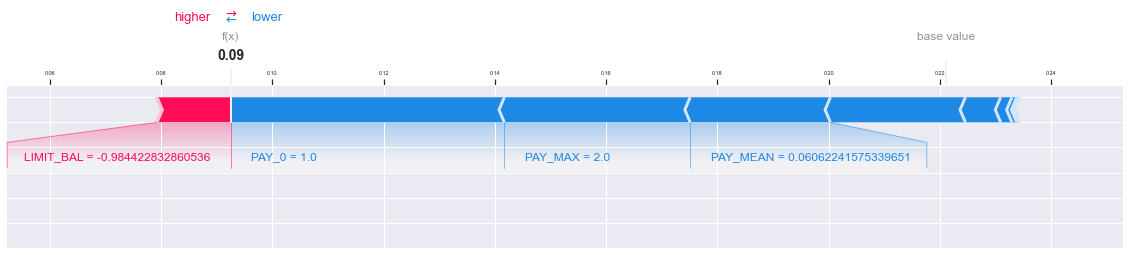

In [33]:
shap.force_plot(
    rf_explainer.expected_value[1],
    test_shap_values[1][0, :],
    X_test_enc.iloc[0, :],
    matplotlib=True,
)

The credit limit is relatively low, which makes defaulting more likely. But the payment were made somewhat regularly, so the chance of defaulting is not very high.

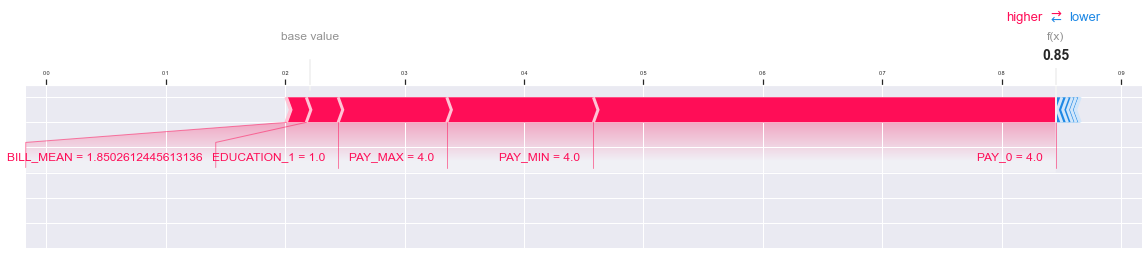

In [34]:
shap.force_plot(
    rf_explainer.expected_value[1],
    test_shap_values[1][2, :],
    X_test_enc.iloc[2, :],
    matplotlib=True,
)

The payment is 4 months behind for this client at the beginning. And the client also went to a graduate school, which contributes to defaulting it seems. The bill amount was overall larger than the average.

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2333
           1       0.65      0.38      0.48       667

    accuracy                           0.82      3000
   macro avg       0.75      0.66      0.68      3000
weighted avg       0.80      0.82      0.80      3000



The accuracy of the decision tree model (81.6%) is only a slight improvement over the baseline model (77.9%). But the recall is a significant improvement over the baseline model's 0 recall. The precision is around two thirds. Still, the overall results are not satisfactory. If the goal is to identify only a small portion of clients to contact with limited resources, this model may still be useful. But the low recall, large number of false negatives, makes it a poor early warning system.

I have not tried K-NN, and it could have improved the performance. I could have tried `(PAY_AMT_X - BILL_AMT_X) / LIMIT_BAL` as a feature with some other models.
The decision tree is highly interpretable, and I don't think it gets much better than the current model except by reducing `max_depth`, but the performance is likely to suffer.

The feature selection could've been done more rigorously, with higher `max_iter`.

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 